In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Checking the data

In [2]:
df = pd.read_csv('selling_price_data.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
df.columns
if '?' in df.columns:
	df = df.drop(columns=['?'])

df.head()

,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# renaming the headers
headers = ["symboling", "make",  
           "fuel-type", "aspiration","num-of-doors", 
           "body-style","drive-wheels", "engine-location", 
           "wheel-base","length", "width","height", "curb-weight", 
           "engine-type","num-of-cylinders", "engine-size",  
           "fuel-system","bore","stroke", "compression-ratio", 
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
# Removing the below columns as they are not useful
columns_not_useful = [
	'make',
	'aspiration',
	'num-of-doors',
	'body-style',
	'drive-wheels',
	'engine-location',
	'engine-type',
	'fuel-system',
]
df = df.drop(columns=columns_not_useful)

In [6]:
# changing fuel type to 0 and 1
df['fuel-type'].unique()
df['fuel-type'] = df['fuel-type'].map({'gas': 0, 'diesel': 1})

df.head()
df['fuel-type'].unique()

df.head()

,symboling,fuel-type,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
1,1,0,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
2,2,0,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,0,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450
4,2,0,99.8,177.3,66.3,53.1,2507,five,136,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
# converting the num-of-cylinders to numbers
df['num-of-cylinders'].unique()
df['num-of-cylinders'] = df['num-of-cylinders'].map({
	'four': 4,
	'six': 6,
	'five': 5,
	'three': 3,
	'twelve': 12,
	'two': 2,
	'eight': 8
})

df.head()

,symboling,fuel-type,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500
1,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500
2,2,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450
4,2,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
# Changing the missing values to NaN
df = df.replace('?', np.nan)
# converting the columns to float
df = df.astype({'price': 'float64', 'horsepower': 'float64', 'peak-rpm': 'float64', 'bore': 'float64', 'stroke': 'float64'})

In [9]:
# sns pairplot
# sns.pairplot(df)
# plt.show()

In [10]:
# Observation 1: The compression ratio is neatly clustered in 2 groups, let's use hue to see if we can find a pattern

# list all the object columns
object_cols = []
for col in df.columns:
	if df[col].dtype == 'object':
		object_cols.append(col)

print(object_cols)
# print head of only object columns
df[object_cols].head()

# print the different fuel types
print(df['fuel-type'].value_counts())

[]
fuel-type
0    184
1     20
Name: count, dtype: int64


In [11]:
# Now, this pairplot doesn't contain the price column
# This is because the price column is not a numerical column
print(df['price'].value_counts())

# The price column contains '?' values, that's why it's not being considered as a numerical column
# Let's replace the '?' values with NaN
df['price'] = df['price'].replace('?', np.nan)
df['price'] = df['price'].astype('float64')

price
16500.0    2
7775.0     2
7295.0     2
7957.0     2
6229.0     2
          ..
16503.0    1
5389.0     1
6189.0     1
6669.0     1
22625.0    1
Name: count, Length: 185, dtype: int64


In [12]:
# creating a pairplot with hue of fuel-type to see if we can find a pattern
# sns.pairplot(df, hue='fuel-type')

<Axes: >

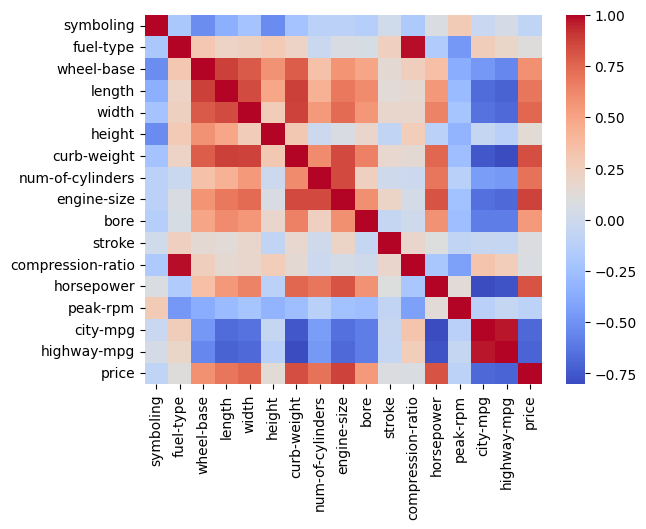

In [13]:
# checking the correlation between the columns
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm')

In [14]:
# Observations:
# 1. The price is highly correlated with engine-size
# 2. The price is highly correlated with curb-weight

# Let's check the correlation of price with engine-size and curb-weight
print(df[['price', 'engine-size', 'curb-weight']].corr())

                price  engine-size  curb-weight
price        1.000000     0.872337     0.834420
engine-size  0.872337     1.000000     0.850611
curb-weight  0.834420     0.850611     1.000000


In [15]:
# Creating a regression model to predict the price of the car
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Price Prediction with 2 columns i.e. 'engine-size' and 'curb-weight'

In [16]:
# Removing rows with NaN values in either price, engine-size or curb-weight
df = df.dropna(subset=['price', 'engine-size', 'curb-weight'])

df.head()

,symboling,fuel-type,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [17]:
X = df[['engine-size', 'curb-weight']]
y = df['price']

# splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_test: values to test of weight and engine size
# y_test : correct price values

y_test.head()

98      8949.0
16     36880.0
31      5399.0
162     8058.0
132    12170.0
Name: price, dtype: float64

In [18]:
# Creating the linear regression model
model = LinearRegression()

# training the model
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Checking the model's performance
y_pred = model.predict(X_test)

# checking score of the model
score = model.score(X_test, y_test)
print(score)

# checking the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.8300345488203997
19044323.61800315


In [20]:
# creating a function that takes the values of engine-size and curb-weight and returns predicted price
def predict_price(curb_weight, engine_size):
	# creating a dataframe with the values
	df = pd.DataFrame({
		'engine-size': [engine_size],
		'curb-weight': [curb_weight]
	})
	
	# predicting the price
	predicted_price = model.predict(df)
	print("The predicted price is:", int(predicted_price[0]))
	
	
predict_price(2000, 100)

The predicted price is: 7445


Price Prediction with single column of 'engine-size'

In [21]:
reg_with_engine_size = LinearRegression()
X = df[['engine-size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_with_engine_size.fit(X_train, y_train)

y_pred = reg_with_engine_size.predict(X_test)

score = reg_with_engine_size.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(score)

0.8096954724507989


Price Prediction with single column of 'curb-weight'

In [22]:
reg_with_curb_weight = LinearRegression()
X = df[['curb-weight']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_with_curb_weight.fit(X_train, y_train)

y_pred = reg_with_curb_weight.predict(X_test)

score = reg_with_curb_weight.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(score)

0.7107738662026627


Comparing prices with all these 3 models

In [23]:
df.head()

,symboling,fuel-type,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,0,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [24]:
to_find = pd.DataFrame({
	'engine-size': [130],
	'curb-weight': [2548]
})

another_to_find = pd.DataFrame({
	'engine-size': [109],
	'curb-weight': [2337]
})

# Training phase 
print("Actual Price", df[(df['engine-size'] == 130) & (df['curb-weight'] == 2548)]['price'])
print("With both engine-size and curb-weight:", int(model.predict(to_find)[0]))
print("With only engine-size:", int(reg_with_engine_size.predict(to_find[['engine-size']])[0]))
print("With only curb-weight:", int(reg_with_curb_weight.predict(to_find[['curb-weight']])[0]))

print("Actual Price", df[(df['engine-size'] == 109) & (df['curb-weight'] == 2337)]['price'])
print("With both engine-size and curb-weight:", int(model.predict(another_to_find)[0]))
print("With only engine-size:", int(reg_with_engine_size.predict(another_to_find[['engine-size']])[0]))
print("With only curb-weight:", int(reg_with_curb_weight.predict(another_to_find[['curb-weight']])[0]))

Actual Price 0    16500.0
Name: price, dtype: float64
With both engine-size and curb-weight: 13521
With only engine-size: 13799
With only curb-weight: 12965
Actual Price 2    13950.0
Name: price, dtype: float64
With both engine-size and curb-weight: 10152
With only engine-size: 10280
With only curb-weight: 10472
